<a href="https://colab.research.google.com/github/Naima-Ashfaq12/DataScience/blob/main/Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
from google.colab import files


from google.colab import files
uploaded = files.upload()

Saving cleaned_student_dataset.csv to cleaned_student_dataset.csv


In [5]:
data = pd.read_csv(io.BytesIO(uploaded['cleaned_student_dataset.csv']))



In [6]:
data.head()

,first_name,last_name,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
0,Paul,Casey,male,False,3,False,27,lawyer,73,81,93,97,63,80,87
1,Danielle,Sandoval,female,False,2,False,47,doctor,90,86,96,100,90,88,90
2,Tina,Andrews,female,False,9,True,13,government officer,81,97,95,96,65,77,94
3,Tara,Clark,female,False,5,False,3,artist,71,74,88,80,89,63,86
4,Anthony,Campos,male,False,5,False,10,unknown,84,77,65,65,80,74,76


In [7]:
numeric_data = data.select_dtypes(include='number')
numeric_data.head()


,absence_days,weekly_self_study_hours,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
0,3,27,73,81,93,97,63,80,87
1,2,47,90,86,96,100,90,88,90
2,9,13,81,97,95,96,65,77,94
3,5,3,71,74,88,80,89,63,86
4,5,10,84,77,65,65,80,74,76


In [8]:
corr_matrix = numeric_data.corr()
corr_matrix


,absence_days,weekly_self_study_hours,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
absence_days,1.000000,-0.286086,-0.237072,-0.128159,-0.136419,-0.084029,-0.090554,-0.084861,-0.002942
weekly_self_study_hours,-0.286086,1.000000,0.393569,0.276231,0.202120,0.201340,0.190481,0.247796,0.153622
math_score,-0.237072,0.393569,1.000000,0.147247,0.115719,0.127131,0.081298,0.134831,0.049672
history_score,-0.128159,0.276231,0.147247,1.000000,0.048478,0.121498,0.088502,0.147193,0.065751
physics_score,-0.136419,0.202120,0.115719,0.048478,1.000000,0.126163,0.132280,0.054314,0.103126
chemistry_score,-0.084029,0.201340,0.127131,0.121498,0.126163,1.000000,0.119992,0.068341,0.065430
biology_score,-0.090554,0.190481,0.081298,0.088502,0.132280,0.119992,1.000000,0.074227,0.106526
english_score,-0.084861,0.247796,0.134831,0.147193,0.054314,0.068341,0.074227,1.000000,0.072250
geography_score,-0.002942,0.153622,0.049672,0.065751,0.103126,0.065430,0.106526,0.072250,1.000000


In [10]:
target = 'math_score'
correlation_with_target = corr_matrix[target].sort_values(ascending=False)
correlation_with_target


,math_score
math_score,1.000000
weekly_self_study_hours,0.393569
history_score,0.147247
english_score,0.134831
chemistry_score,0.127131
physics_score,0.115719
biology_score,0.081298
geography_score,0.049672
absence_days,-0.237072


In [11]:
top_features = correlation_with_target[1:4]  # skip first one (math itself)
print("Top 3 correlated features with 'math':")
print(top_features)


Top 3 correlated features with 'math':
weekly_self_study_hours    0.393569
history_score              0.147247
english_score              0.134831
Name: math_score, dtype: float64


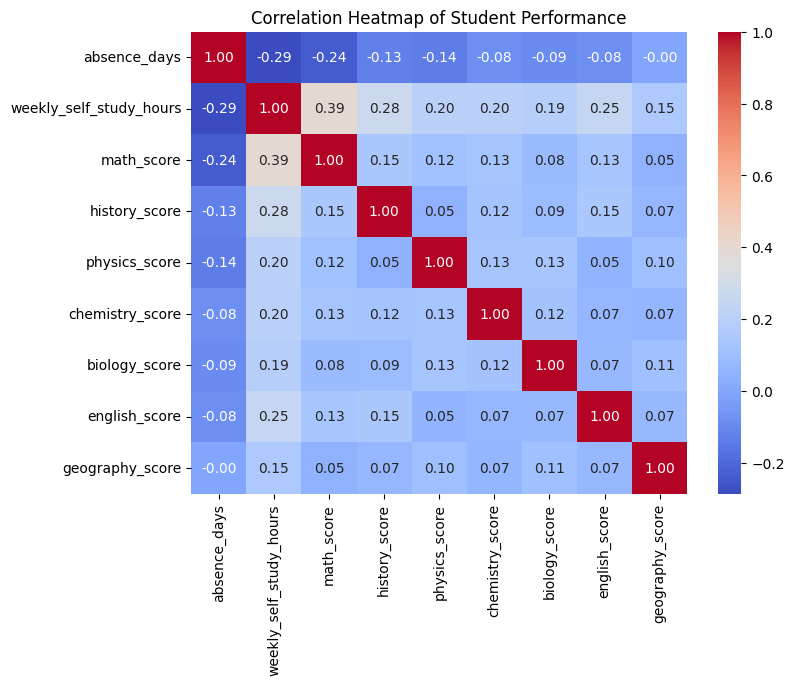

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Student Performance')
plt.show()
